In [5]:
load("modular_symbol_map.pyx")


Compiling ./modular_symbol_map.pyx...


In [15]:
d = 3
# much more ms, since this code is massively faster...
ms = [m for m in prime_range(3,50000) if gcd(m, 11) == 1 and euler_phi(m) % d == 0]
print(ms)

[7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97, 103, 109, 127, 139, 151, 157, 163, 181, 193, 199, 211, 223, 229, 241, 271, 277, 283, 307, 313, 331, 337, 349, 367, 373, 379, 397, 409, 421, 433, 439, 457, 463, 487, 499, 523, 541, 547, 571, 577, 601, 607, 613, 619, 631, 643, 661, 673, 691, 709, 727, 733, 739, 751, 757, 769, 787, 811, 823, 829, 853, 859, 877, 883, 907, 919, 937, 967, 991, 997, 1009, 1021, 1033, 1039, 1051, 1063, 1069, 1087, 1093, 1117, 1123, 1129, 1153, 1171, 1201, 1213, 1231, 1237, 1249, 1279, 1291, 1297, 1303, 1321, 1327, 1381, 1399, 1423, 1429, 1447, 1453, 1459, 1471, 1483, 1489, 1531, 1543, 1549, 1567, 1579, 1597, 1609, 1621, 1627, 1657, 1663, 1669, 1693, 1699, 1723, 1741, 1747, 1753, 1759, 1777, 1783, 1789, 1801, 1831, 1861, 1867, 1873, 1879, 1933, 1951, 1987, 1993, 1999, 2011, 2017, 2029, 2053, 2083, 2089, 2113, 2131, 2137, 2143, 2161, 2179, 2203, 2221, 2239, 2251, 2269, 2281, 2287, 2293, 2311, 2341, 2347, 2371, 2377, 2383, 2389, 2437, 2467, 2473, 2503, 2521, 2539, 2551,

In [16]:
M = ModularSymbols(17,sign=1).cuspidal_submodule()
N = M.level()
ms_map = ModularSymbolMap(M)
ms_denom = ZZ(ms_map.denom)
inf_zero = M.rational_period_mapping()([oo,0])[0]
print ms_denom, inf_zero
def f(a,b):
    return ms_map._eval1(a,b)[0] / ms_denom

1 1


In [28]:
ModularSymbols(17,sign=1).cuspidal_submodule()

Modular Symbols subspace of dimension 1 of Modular Symbols space of dimension 2 for Gamma_0(17) of weight 2 with sign 1 over Rational Field

In [29]:
EllipticCurve('17a')

Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - x - 14 over Rational Field

In [17]:
def alphas(m, d, normalize=True):
    assert d%2 == 1
    R = Integers(m)
    Npow = R(N)^((d-1)//2)
    gen = R(primitive_root(m))
    n = euler_phi(m)//d
    b = gen
    h = gen^d
    if normalize:
        denom = float(sqrt(euler_phi(m)*log(m)))
    else:
        denom = 1
    alphas = []
    for i in range(1, (d-1)//2 + 1):
        s = 0
        for j in range(n):
            period = f((Npow * b^i * h^j).lift(), m) + inf_zero
            #print "{0, %s} --> %s"%((b^i * h^j).lift()/ZZ(m), period)
            s += period
        alphas.append(s / denom)
    return alphas

In [18]:
%%time
data = []
for m in ms:
    data += alphas(m, d)

CPU times: user 1min 23s, sys: 20 ms, total: 1min 23s
Wall time: 1min 23s


2556
-0.0621739037856


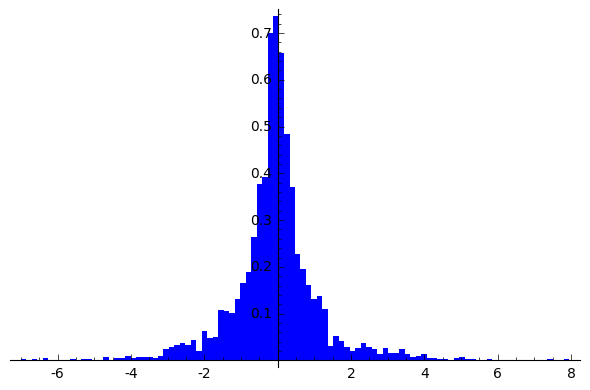

In [19]:
print len(data)
t = stats.TimeSeries(data)
print t.mean()
t.plot_histogram(bins=100)

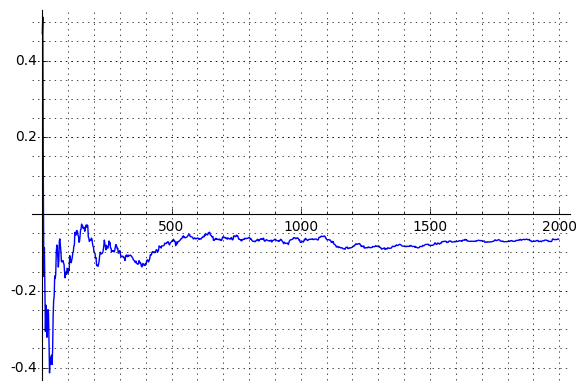

In [20]:
stats.TimeSeries(t[:i].mean() for i in range(5,len(t))).plot(
      gridlines='minor')

In [30]:
d = 3
# much more ms, since this code is massively faster...
ms = [m for m in prime_range(3,50000) if gcd(m, 11) == 1 and euler_phi(m) % d == 0]
print(ms)

[7, 13, 19, 31, 37, 43, 61, 67, 73, 79, 97, 103, 109, 127, 139, 151, 157, 163, 181, 193, 199, 211, 223, 229, 241, 271, 277, 283, 307, 313, 331, 337, 349, 367, 373, 379, 397, 409, 421, 433, 439, 457, 463, 487, 499, 523, 541, 547, 571, 577, 601, 607, 613, 619, 631, 643, 661, 673, 691, 709, 727, 733, 739, 751, 757, 769, 787, 811, 823, 829, 853, 859, 877, 883, 907, 919, 937, 967, 991, 997, 1009, 1021, 1033, 1039, 1051, 1063, 1069, 1087, 1093, 1117, 1123, 1129, 1153, 1171, 1201, 1213, 1231, 1237, 1249, 1279, 1291, 1297, 1303, 1321, 1327, 1381, 1399, 1423, 1429, 1447, 1453, 1459, 1471, 1483, 1489, 1531, 1543, 1549, 1567, 1579, 1597, 1609, 1621, 1627, 1657, 1663, 1669, 1693, 1699, 1723, 1741, 1747, 1753, 1759, 1777, 1783, 1789, 1801, 1831, 1861, 1867, 1873, 1879, 1933, 1951, 1987, 1993, 1999, 2011, 2017, 2029, 2053, 2083, 2089, 2113, 2131, 2137, 2143, 2161, 2179, 2203, 2221, 2239, 2251, 2269, 2281, 2287, 2293, 2311, 2341, 2347, 2371, 2377, 2383, 2389, 2437, 2467, 2473, 2503, 2521, 2539, 2551,

In [31]:
M = ModularSymbols(17,sign=1).cuspidal_submodule()
N = M.level()
ms_map = ModularSymbolMap(M)
ms_denom = ZZ(ms_map.denom)
inf_zero = M.rational_period_mapping()([oo,0])[0]
print ms_denom, inf_zero
def f(a,b):
    return ms_map._eval1(a,b)[0] / ms_denom

1 1
